In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
df.columns = [['RD',"Admin","MS","State","Profit"]]
df.head()

,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.isna().sum()

RD        0
Admin     0
MS        0
State     0
Profit    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   (RD,)      50 non-null     float64
 1   (Admin,)   50 non-null     float64
 2   (MS,)      50 non-null     float64
 3   (State,)   50 non-null     object 
 4   (Profit,)  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,RD,Admin,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df['State'].value_counts()

(State,)  
California    17
New York      17
Florida       16
dtype: int64

In [7]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["State"] = LE.fit_transform(df["State"])
df.head()

,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [11]:
df.corr()

,RD,Admin,MS,State,Profit
RD,1.000000,0.241955,0.724248,0.104685,0.972900
Admin,0.241955,1.000000,-0.032154,0.011847,0.200717
MS,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [12]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
df_scaled = SS.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled,columns = ["RD","Admin","Ms","State","Profit"])
df_scaled.iloc[0:10]

,RD,Admin,Ms,State,Profit
0,2.016411,0.560753,2.153943,1.212678,2.011203
1,1.955860,1.082807,1.923600,-1.212678,1.999430
2,1.754364,-0.728257,1.626528,0.000000,1.980842
3,1.554784,-0.096365,1.422210,1.212678,1.776627
4,1.504937,-1.079919,1.281528,0.000000,1.357740
5,1.279800,-0.776239,1.254210,1.212678,1.127250
6,1.340066,0.932147,-0.688150,-1.212678,1.105481
7,1.245057,0.871980,0.932186,0.000000,1.096210
8,1.030369,0.986952,0.830887,1.212678,1.007470
9,1.091819,-0.456640,0.776107,-1.212678,0.946022


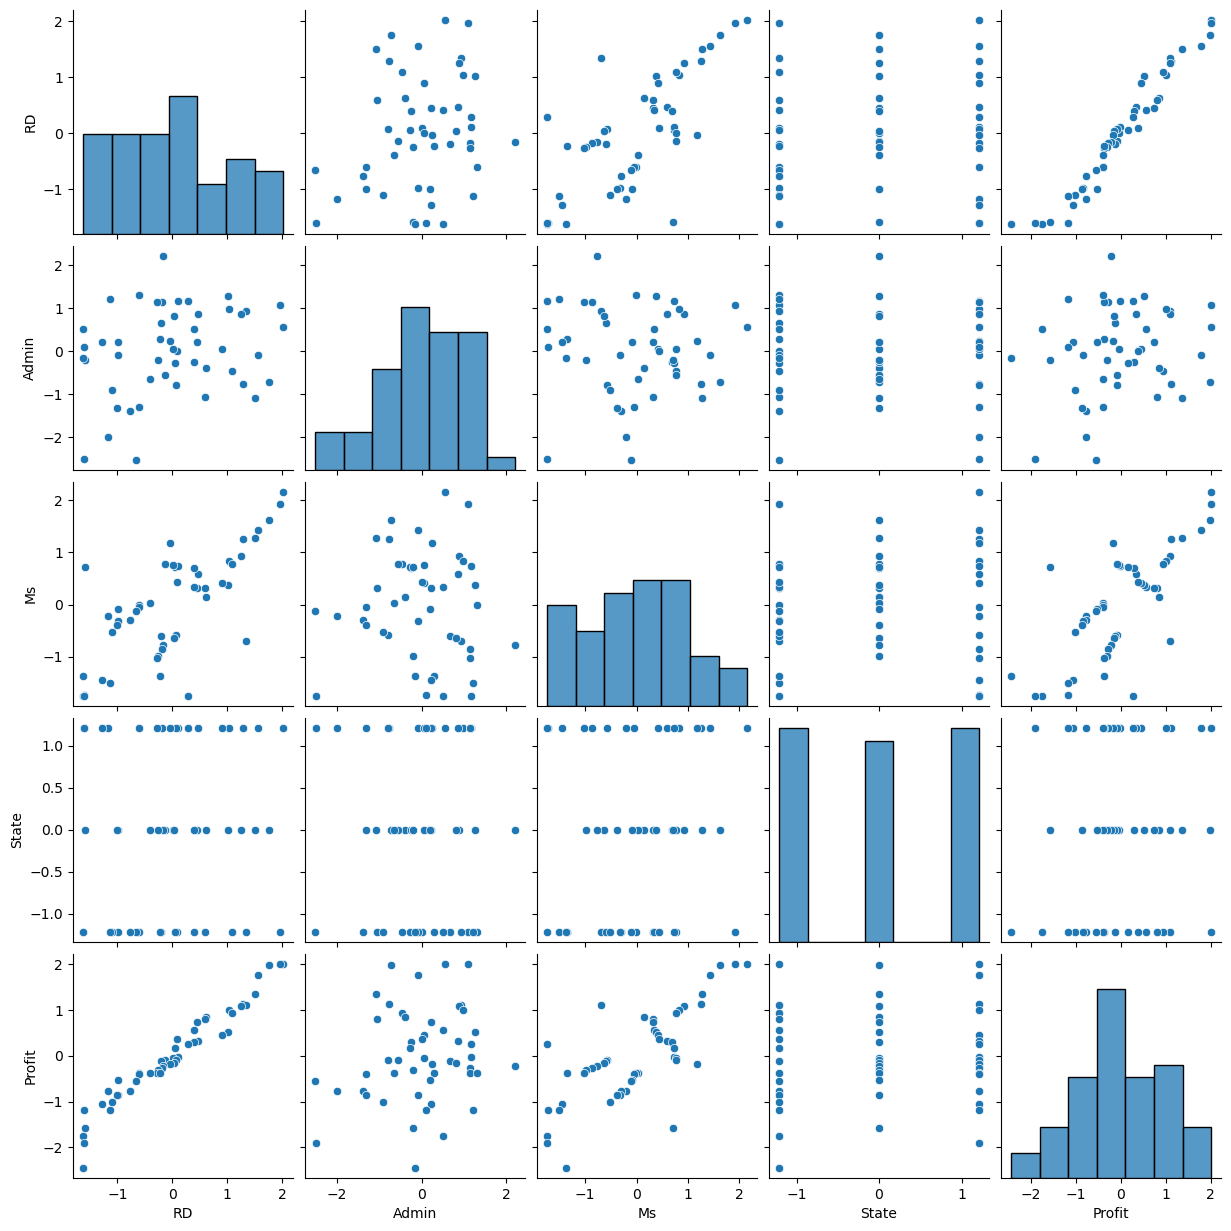

In [13]:
import seaborn as sns
sns.pairplot(df_scaled)

In [14]:
#Build a model

In [15]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~RD+Admin+MS+State', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           8.51e-29
Time:                        11:08:37   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RD             0.8058      0.046     17.609      0.000       0.714       0.898
Admin         -0.0268      0.052     -0.520      0.606      -0.131       0.077
MS             0.0272      0.017      1.637      0.109      -0.006       0.061
State        -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model.params

Intercept    50142.506443
RD               0.805760
Admin           -0.026826
MS               0.027228
State          -22.320577
dtype: float64

In [17]:
print(model.tvalues, model.pvalues)

Intercept     7.368962
RD           17.608621
Admin        -0.519906
MS            1.636966
State        -0.013865
dtype: float64 Intercept    2.900008e-09
RD           8.249206e-22
Admin        6.056771e-01
MS           1.086131e-01
State        9.889988e-01
dtype: float64


In [18]:
model.rsquared

0.9507462044842656

In [19]:
m_r = smf.ols('Profit~RD', data = df).fit()
print(m_r.tvalues, '\n' , m_r.pvalues)

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [20]:
m_rr = smf.ols('Profit~Admin', data = df).fit()
print(m_rr.tvalues, '\n' , m_rr.pvalues)

Intercept    3.040044
Admin        1.419493
dtype: float64 
 Intercept    0.003824
Admin        0.162217
dtype: float64


In [21]:
m_rk = smf.ols('Profit~RD+Admin', data = df).fit()
print(m_rk.tvalues, '\n' , m_rk.pvalues)

Intercept     9.122352
RD           28.588870
Admin        -1.072677
dtype: float64 
 Intercept    5.695336e-12
RD           2.278348e-31
Admin        2.888932e-01
dtype: float64


In [142]:
m_rt = smf.ols('Profit~Admin+MS', data = df).fit()
print(m_rt.tvalues, '\n' , m_rt.pvalues)

Intercept    1.418867
Admin        2.193255
MS           7.524659
dtype: float64 
 Intercept    1.628273e-01
Admin        3.349763e-02
MS           1.710243e-09
dtype: float64


In [22]:
m_ak = smf.ols('Profit~MS', data = df).fit()
print(m_ak.tvalues, '\n' , m_ak.pvalues)
#multi collinerity issues exist
#State and Admin

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [23]:
m_a = smf.ols('Profit~State', data = df).fit()
print(m_a.tvalues, '\n' , m_a.pvalues)

Intercept    11.891440
State         0.708948
dtype: float64 
 Intercept    6.485443e-16
State        4.817858e-01
dtype: float64


In [24]:
m_a = smf.ols('Profit~State+MS', data = df).fit()
print(m_a.tvalues, '\n' , m_a.pvalues)

Intercept    6.605213
State        0.453759
MS           7.679227
dtype: float64 
 Intercept    3.249190e-08
State        6.520907e-01
MS           7.700129e-10
dtype: float64


In [25]:
#Calculating the VIF Factor to know about the multi collinarity issues


In [26]:
rsq_RD = smf.ols('RD~Admin+MS+State', data = df).fit().rsquared
vif_RD = 1/(1-rsq_RD)

In [27]:
rsq_Admin = smf.ols("Admin~RD+MS+State",data = df).fit().rsquared
vif_Admin = 1/(1-rsq_Admin)

In [28]:
rsq_MS = smf.ols("MS~RD+Admin+State",data = df).fit().rsquared
vif_MS = 1/(1-rsq_MS)

In [29]:
rsq_State = smf.ols("State~RD+Admin+MS",data = df).fit().rsquared
vif_State = 1/(1-rsq_State)

In [30]:
d1 = {'variables' :['RD','Admin','MS','State'], 'VIP' : [vif_RD, vif_Admin, vif_MS, vif_State] }
Vif_frame = pd.DataFrame(d1)
Vif_frame

,variables,VIP
0,RD,2.481178
1,Admin,1.175315
2,MS,2.326780
3,State,1.011281


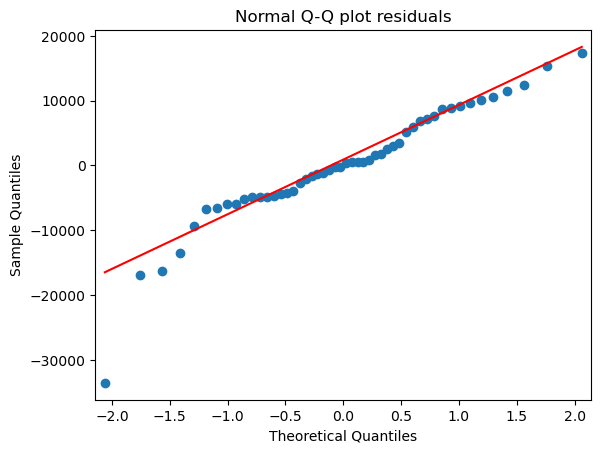

In [31]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title("Normal Q-Q plot residuals")
plt.show()

In [32]:
list(np.where(model.resid<-10000))

[array([14, 15, 48, 49], dtype=int64)]

In [33]:
def get_Standardized_values( vals):
    return( vals - vals.mean())/vals.std()
#here standardized mean it Z values

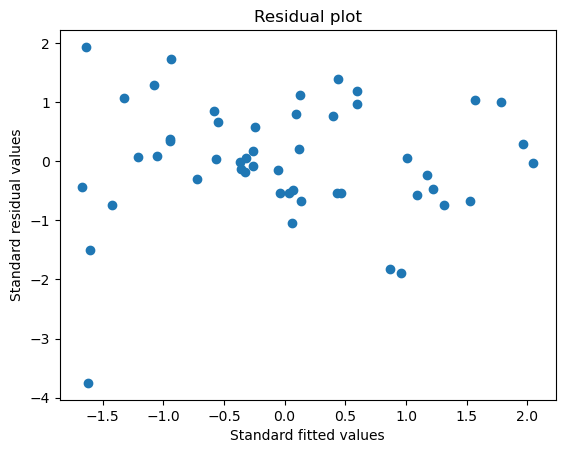

In [34]:
plt.scatter(get_Standardized_values(model.fittedvalues), get_Standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standard fitted values')
plt.ylabel('Standard residual values')
plt.show()

eval_env: 1


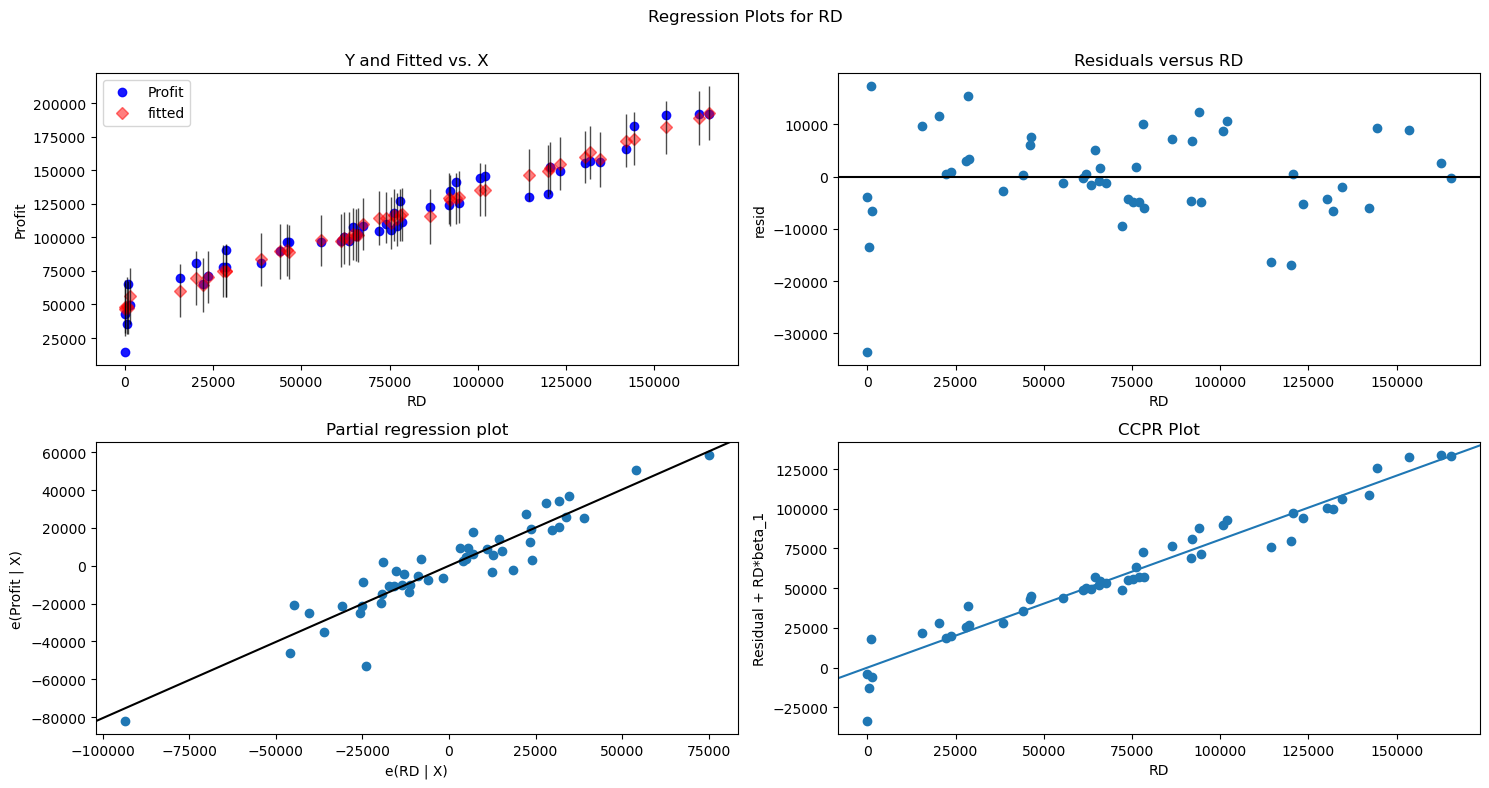

In [35]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig = fig)
plt.show()

eval_env: 1


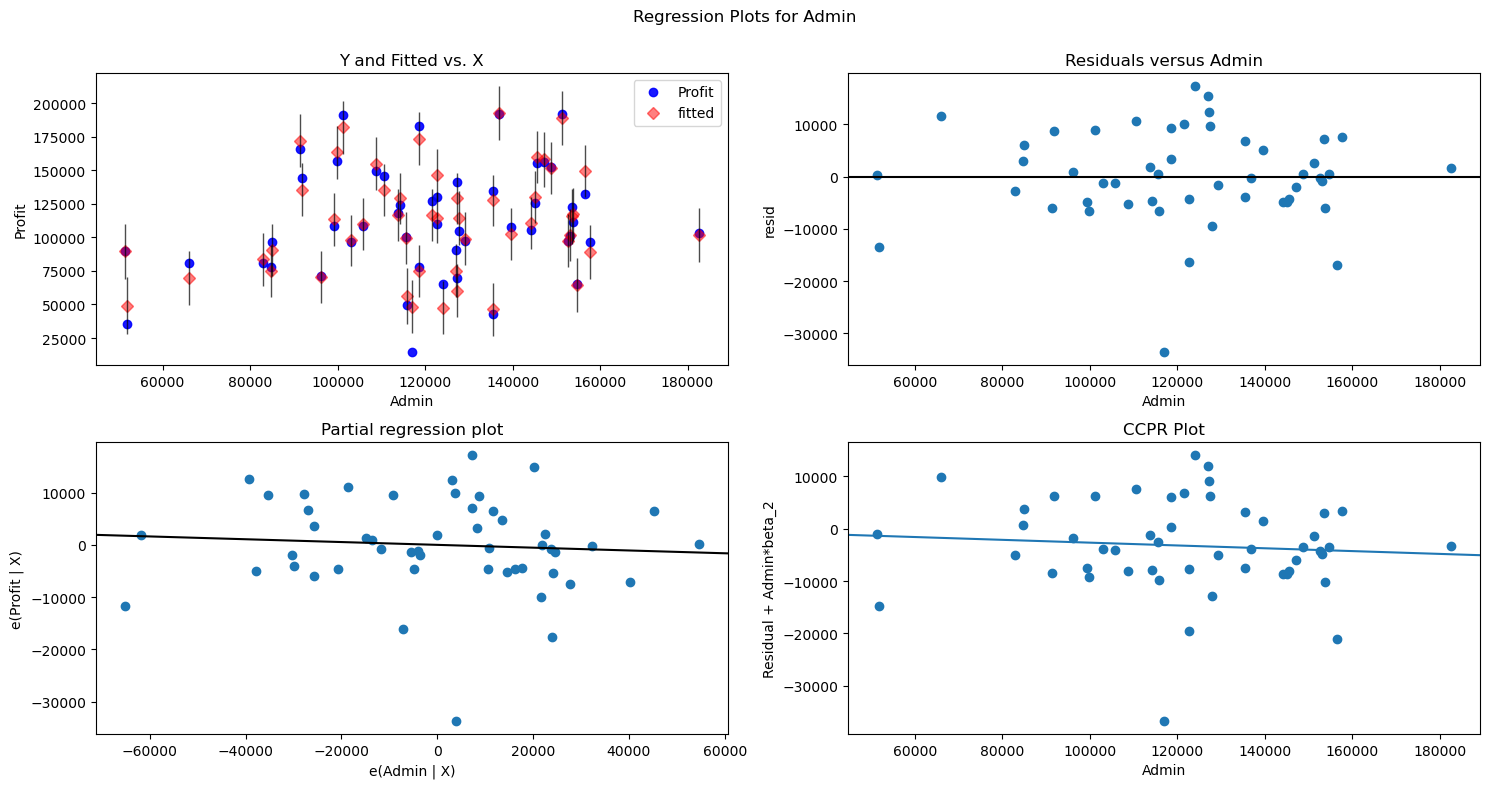

In [36]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin", fig = fig)
plt.show()

eval_env: 1


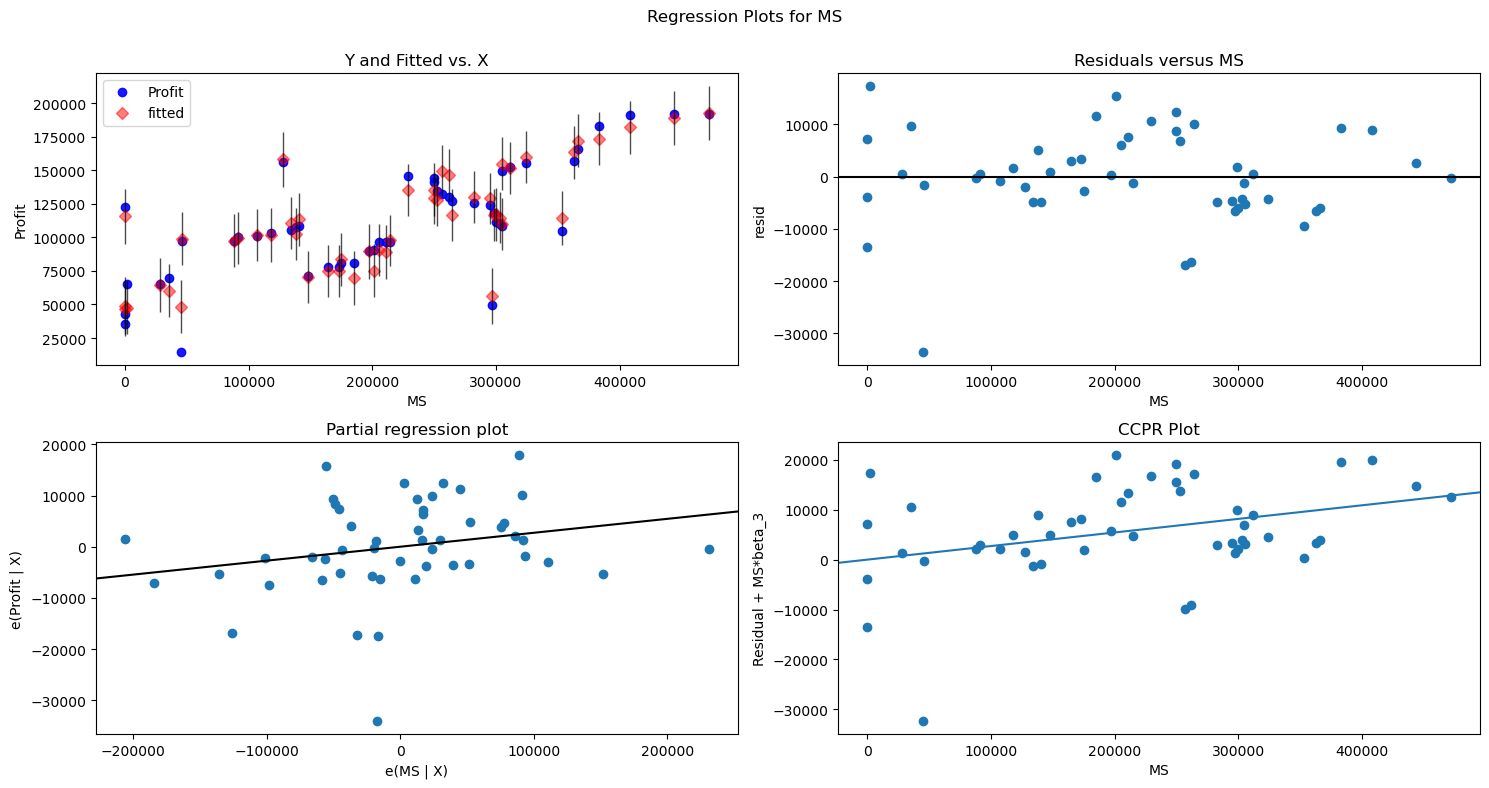

In [37]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig = fig)
plt.show()

eval_env: 1


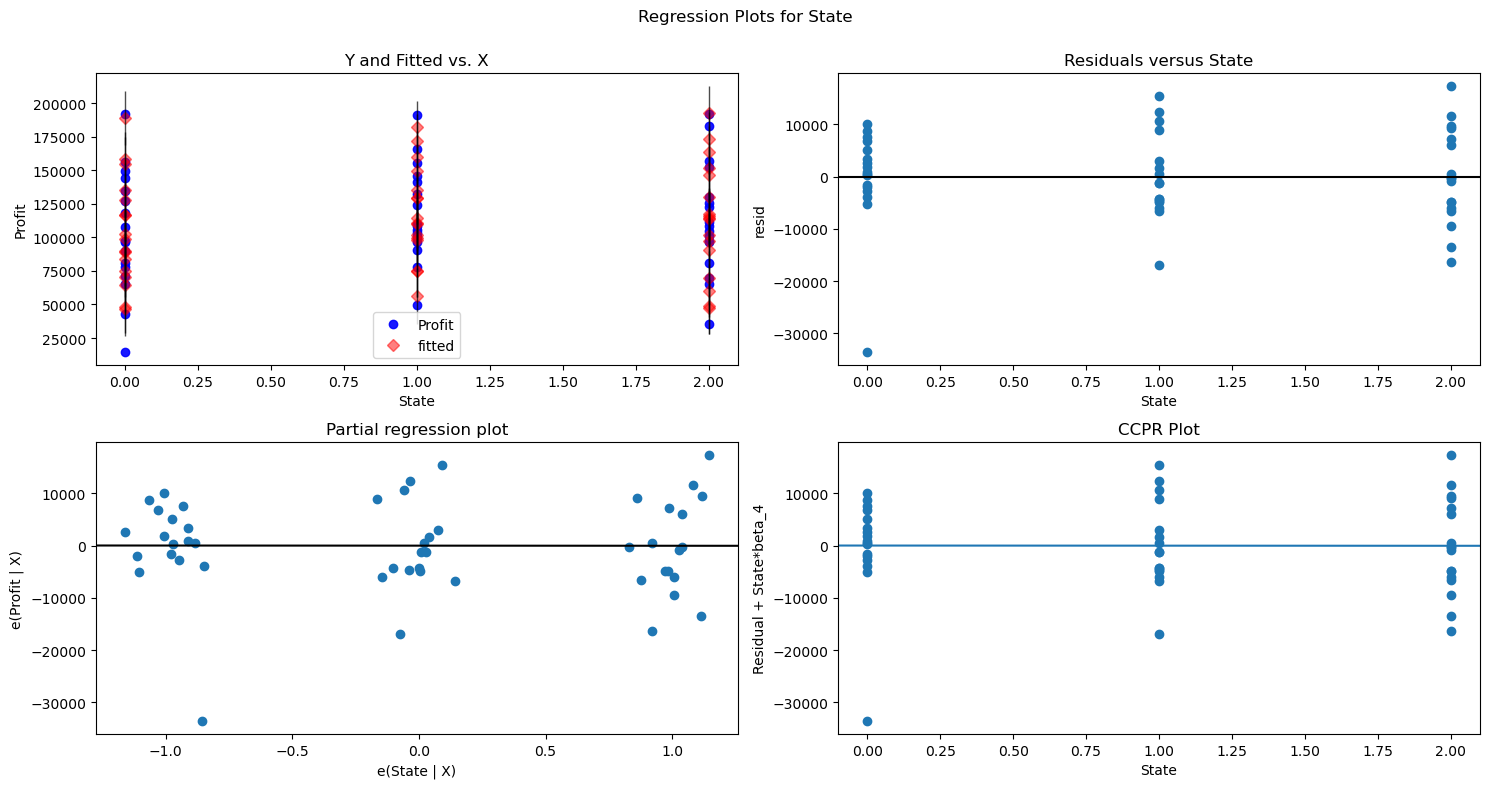

In [38]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "State", fig = fig)
plt.show()

In [39]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance 

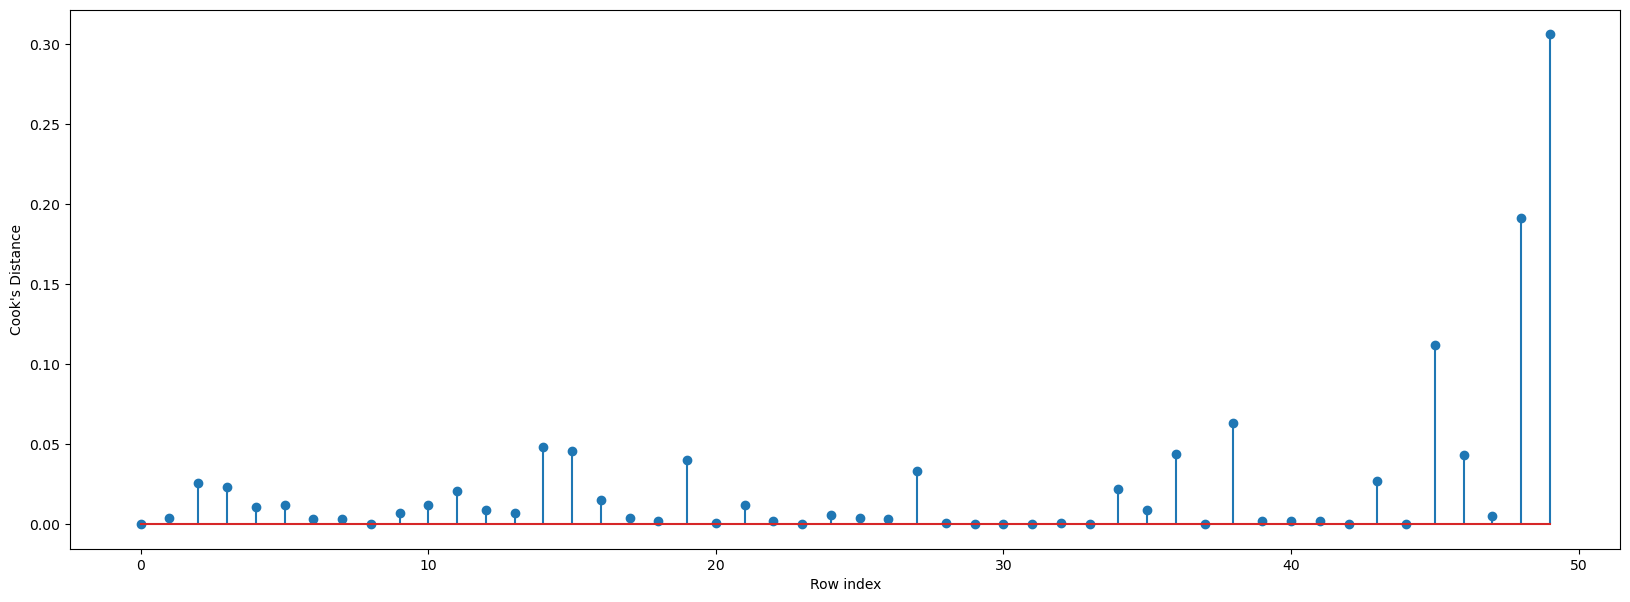

In [40]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(df)), np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("Cook's Distance")
plt.show()

In [41]:
(np.argmax(c),np.max(c))

(49, 0.30602819546993376)

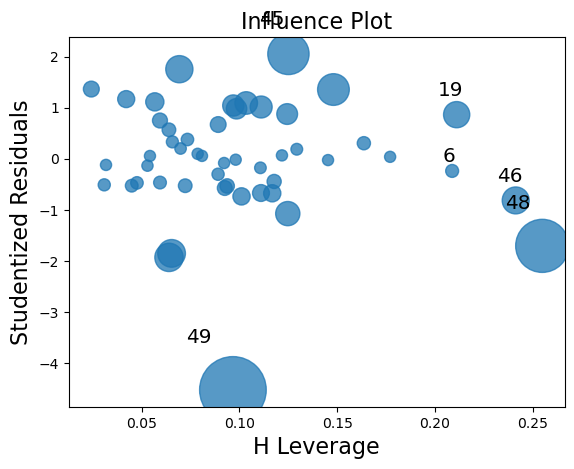

In [42]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [43]:
k = df.shape[1]
n  = df.shape[0]
leverage_cutoff = 3*((k+1)/n)

In [44]:
leverage_cutoff

0.36

In [46]:
df[df.index.isin([49,48])]

,RD,Admin,MS,State,Profit
48,542.05,51743.15,0.00,2,35673.41
49,0.00,116983.80,45173.06,0,14681.40


In [124]:
df.head()

,index,RD,Admin,MS,State,Profit
0,0,165349.20,136897.80,471784.10,2,192261.83
1,1,162597.70,151377.59,443898.53,0,191792.06
2,2,153441.51,101145.55,407934.54,1,191050.39
3,3,144372.41,118671.85,383199.62,2,182901.99
4,4,142107.34,91391.77,366168.42,1,166187.94


In [157]:
df.head()

,index,RD,Admin,MS,State,Profit
0,0,165349.20,136897.80,471784.10,2,192261.83
1,1,162597.70,151377.59,443898.53,0,191792.06
2,2,153441.51,101145.55,407934.54,1,191050.39
3,3,144372.41,118671.85,383199.62,2,182901.99
4,4,142107.34,91391.77,366168.42,1,166187.94


In [126]:
data = df.drop(dfn.index[[46,47,19]],axis=0).reset_index()

In [128]:
data = data.drop(["level_0","index"],axis =1)

In [131]:
data.head()

,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [95]:
dfn = pd.read_csv('50_Startups.csv')

In [242]:
model2 = smf.ols('Profit~RD+MS+State', data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     320.1
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.81e-28
Time:                        13:45:21   Log-Likelihood:                -462.13
No. Observations:                  45   AIC:                             932.3
Df Residuals:                      41   BIC:                             939.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.306e+04   2779.007     19.091      0.000    4.74e+04    5.87e+04
RD             0.7248      0.040     18.091      0.000       0.644       0.806
MS             0.0376      0.015      2.463      0.018       0.007       0.068
State       -971.6313   1342.609     -0.724      0.473   -3683.084    1739.822
==============================================================================
Omnibus:                        0.233   Durbin-Watson:                   1.496
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.383
Skew:                           0.144   Prob(JB):                        0.826
Kurtosis:                       2.652   Cond. No.                     6.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [243]:
model2.rsquared, model2.aic

(0.9590538655725036, 932.2591306176763)

In [158]:
model3 = smf.ols('Profit~RD+Admin+State', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     300.3
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           6.32e-28
Time:                        12:35:23   Log-Likelihood:                -463.50
No. Observations:                  45   AIC:                             935.0
Df Residuals:                      41   BIC:                             942.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.389e+04   5459.676     11.703      0.000    5.29e+04    7.49e+04
RD             0.8094      0.027     29.716      0.000       0.754       0.864
Admin         -0.0775      0.043     -1.811      0.078      -0.164       0.009
State       -579.9169   1381.289     -0.420      0.677   -3369.487    2209.653
==============================================================================
Omnibus:                        0.512   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.635
Skew:                           0.095   Prob(JB):                        0.728
Kurtosis:                       2.450   Cond. No.                     7.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#By comparing the two models we can say that the Administration can be removed

In [150]:
model2_influence_v = model2.get_influence()
(cv,_) = model2_influence_v.cooks_distance

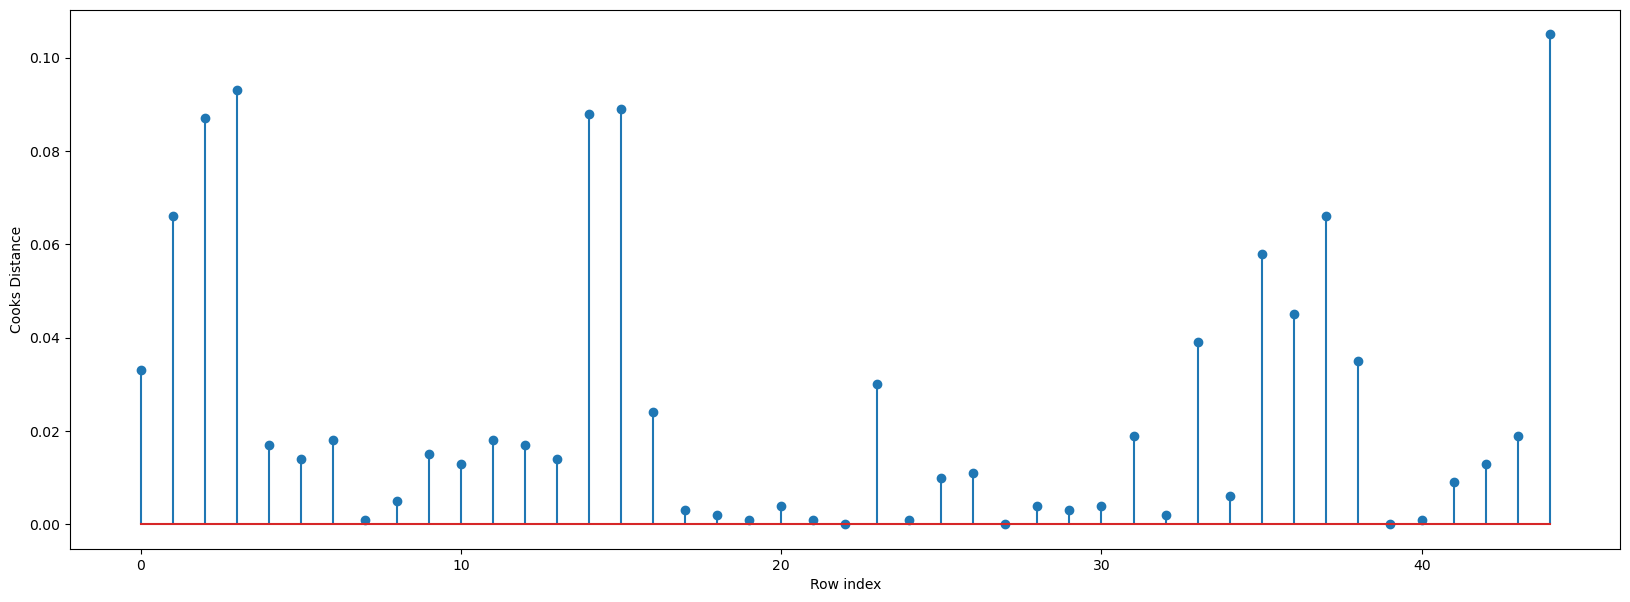

In [151]:
fig = plt.subplots(figsize= (20,7))
plt.stem(np.arange(len(data)),np.round(cv,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [165]:
data.dropna(inplace=True)

# Transformations

In [171]:
#Exponential 
model_trans = smf.ols("np.log(Profit)~RD+MS+State", data = data).fit()
model_trans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Profit)   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     316.0
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           2.33e-28
Time:                        12:47:56   Log-Likelihood:                 63.363
No. Observations:                  45   AIC:                            -118.7
Df Residuals:                      41   BIC:                            -111.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0903      0.024    470.523      0.000      11.043      11.138
RD          6.143e-06    3.4e-07     18.078      0.000    5.46e-06    6.83e-06
MS          3.009e-07    1.3e-07      2.322      0.025    3.92e-08    5.63e-07
State         -0.0085      0.011     -0.746      0.460      -0.031       0.015
==============================================================================
Omnibus:                        0.171   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.918   Jarque-Bera (JB):                0.001
Skew:                           0.010   Prob(JB):                        0.999
Kurtosis:                       2.984   Cond. No.                     6.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [225]:
model_trans.resid.iloc[0:10]

0   -0.064397
1   -0.058543
2    0.013144
3    0.041205
4   -0.044084
5   -0.028679
6    0.002707
7   -0.023668
8    0.025449
9   -0.022939
dtype: float64

In [202]:
pred_trans = model_trans.predict(data)
pred_exp = np.exp(pred_trans)
pred_exp.iloc[0:10]

0    205050.315497
1    203355.289032
2    188555.690661
3    175518.709885
4    173678.015450
5    161558.679770
6    155700.475496
7    159482.875149
8    148387.038102
9    153235.048700
dtype: float64

In [226]:
np.exp(model_trans.resid).iloc[0:10]

0    0.937632
1    0.943138
2    1.013231
3    1.042065
4    0.956874
5    0.971728
6    1.002711
7    0.976610
8    1.025775
9    0.977322
dtype: float64

In [204]:
new = pd.DataFrame(pred_exp)
new.head()

,0
0,205050.315497
1,203355.289032
2,188555.690661
3,175518.709885
4,173678.015450


In [221]:
new.columns = ['predict']
new.iloc[0:2]

,predict
0,205050.315497
1,203355.289032


In [219]:
old = data['Profit']
old.iloc[0:2]

,Profit
0,192261.83
1,191792.06


In [232]:
old1 = pd.concat([new,old],axis = 1)
old1.iloc[0:5]
old1.columns = [["Predicted values", "Actual Values"]]
old1.head()

,Predicted values,Actual Values
0,205050.315497,192261.83
1,203355.289032,191792.06
2,188555.690661,191050.39
3,175518.709885,182901.99
4,173678.015450,166187.94


In [228]:
model_trans.rsquared

0.9585472169635083

In [236]:
#Sqrt 
model_sqrt = smf.ols("np.sqrt(Profit)~np.sqrt(RD)+np.sqrt(MS)+np.sqrt(State)", data = data).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Profit)   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     145.6
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           6.80e-22
Time:                        13:24:21   Log-Likelihood:                -184.20
No. Observations:                  45   AIC:                             376.4
Df Residuals:                      41   BIC:                             383.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        180.7369      8.730     20.704      0.000     163.107     198.367
np.sqrt(RD)        0.5326      0.042     12.704      0.000       0.448       0.617
np.sqrt(MS)        0.0324      0.026      1.265      0.213      -0.019       0.084
np.sqrt(State)     1.4114      3.829      0.369      0.714      -6.322       9.145
==============================================================================
Omnibus:                       16.012   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.895
Skew:                           1.204   Prob(JB):                     4.78e-05
Kurtosis:                       5.195   Cond. No.                     2.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [238]:
model_sqrt.rsquared

0.9142145325842608

In [240]:
model_sqrt.resid.iloc[0:5]

0    16.880763
1    20.818615
2    25.588310
3    22.478595
4     5.099366
dtype: float64

In [244]:
df = {"Model" : pd.Series(["model1", "model2", "model_exp", "model_sqrt"]),
     "Rsquare":pd.Series([model.rsquared,model2.rsquared,model_trans.rsquared, model_sqrt.rsquared])}
table = pd.DataFrame(df)
table

,Model,Rsquare
0,model1,0.950746
1,model2,0.959054
2,model_exp,0.958547
3,model_sqrt,0.914215


In [ ]:

#The model1 is before the multi-collinearity issues
#model2 is about the after resolving the multi-collineatrity issues
#model_Exp is the exponential Transformation
#model_sqrt is the square root transformation
#So the best model is the 2nd model .


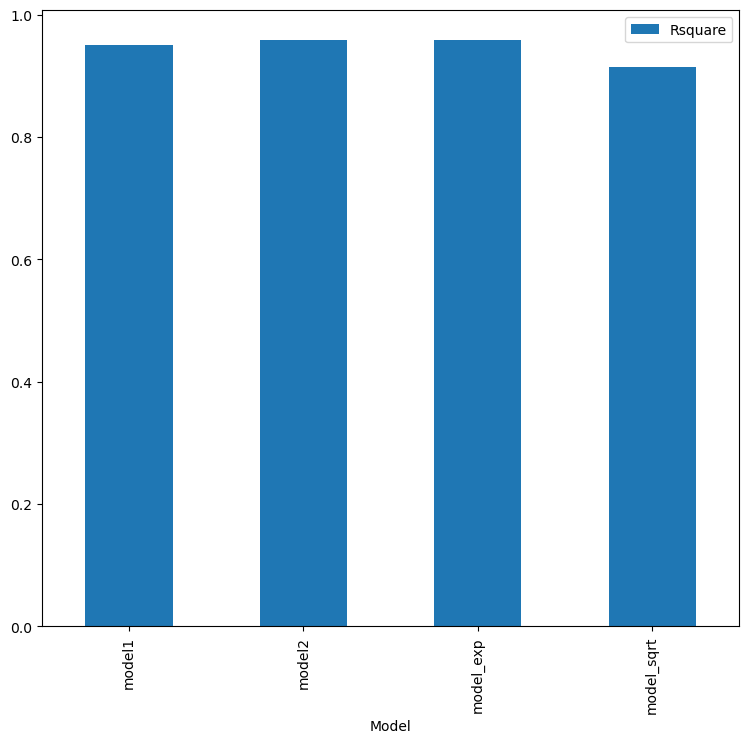

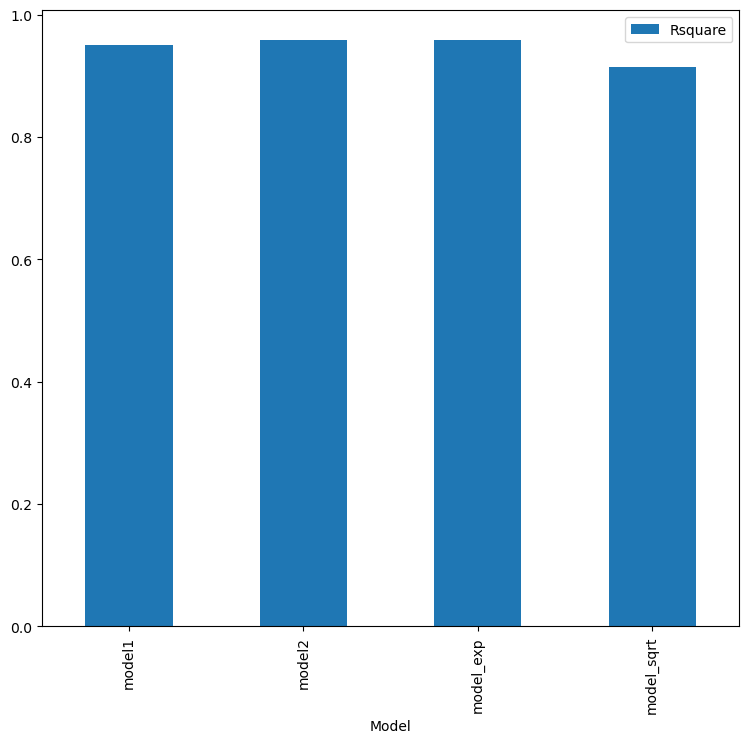

In [249]:
table.plot(x="Model", y="Rsquare", kind="bar", figsize=(9, 8))
plt.show()

# Predicting a new data point

In [229]:
new_data = pd.DataFrame({"RD" : 134578.45, "MS":383199.20,"Admin":91790.61 ,"State" :1},index = [1])
new_data

,RD,MS,Admin,State
1,134578.45,383199.2,91790.61,1


In [156]:
model2.predict(new_data)

1    165127.588558
dtype: float64